# Importamos todas las librerias necesarias para el proyecto y el database

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modelos a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,log_loss



#Cargamos el archivo .csv que es el database del proyecto y visualizamos algunas caracteristicas de él

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/isaavedrab85/PROYECTO/refs/heads/main/PROYECTO/01database.csv',sep=';')
print(df.head())
df.shape
df.info()
df.describe()

   RUT SEXO  TIPO COL        COMUNA  P_POND  P_PROM  P_NEM  RK_COL  P_LEN  \
0    1    M         1     PEÑALOLEN  788.70   823.0    771     771    729   
1    2    M         2  SAN BERNARDO  709.25   682.5    785     813    669   
2    3    M         2    LA FLORIDA  683.00   638.0    779     835    607   
3    4    F         3         AYSEN  776.15   680.5    928    1000    656   
4    5    M         2     QUILICURA  858.70   858.0    900     917    799   

   P_M1  ...  C2_24-2  AYG_24-2  C1_24-2  AP_AYG  AP_CI  AP_AL  AP_C2  \
0   917  ...    4.000       0.0      0.0  100000  10000   1000    100   
1   696  ...    5.725       0.0      0.0  100000  10000   1000    100   
2   669  ...    4.800       0.0      0.0  100000  10000   1000    100   
3   705  ...    1.200       0.0      0.0  100000  10000      0      0   
4   917  ...    6.440       0.0      0.0  100000  10000   1000    100   

   AP_AYG_2  AP_CI_2   Total  
0         0        0  111100  
1         0        0  111100  
2    

,RUT,TIPO COL,P_POND,P_PROM,P_NEM,RK_COL,P_LEN,P_M1,POND_SIN_M2,P_M2,...,C2_24-2,AYG_24-2,C1_24-2,AP_AYG,AP_CI,AP_AL,AP_C2,AP_AYG_2,AP_CI_2,Total
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,2.091354,705.314519,700.242251,749.657423,774.440457,674.528548,725.955954,683.165987,442.970636,...,3.853311,0.658418,0.514869,77487.765090,8189.233279,688.417618,67.047308,1.076672,0.079935,86433.619902
std,177.102136,0.572924,68.437849,83.492038,111.307632,128.097958,90.987580,104.960324,66.690282,80.165387,...,2.175082,1.538108,1.383147,41800.396342,3853.961746,463.518381,47.042527,3.102128,0.271414,44948.986282
min,1.000000,0.000000,503.000000,426.500000,356.000000,364.000000,375.000000,452.000000,481.600000,246.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,2.000000,654.300000,640.500000,680.000000,685.000000,600.000000,657.000000,635.550000,393.000000,...,2.600000,0.000000,0.000000,100000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,101001.000000
50%,307.000000,2.000000,711.900000,695.500000,757.000000,782.000000,679.000000,717.000000,690.800000,437.000000,...,4.600000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
75%,460.000000,2.000000,751.550000,758.000000,837.000000,872.000000,738.000000,797.000000,729.700000,487.000000,...,5.325000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
max,613.000000,4.000000,919.050000,907.000000,1000.000000,1000.000000,935.000000,990.000000,885.950000,718.000000,...,7.000000,5.975000,6.080000,100000.000000,10000.000000,1000.000000,100.000000,10.000000,1.000000,111100.000000


#Gráficamos en histogramas las variables (sin procesar, ni estandarizar) del dataset

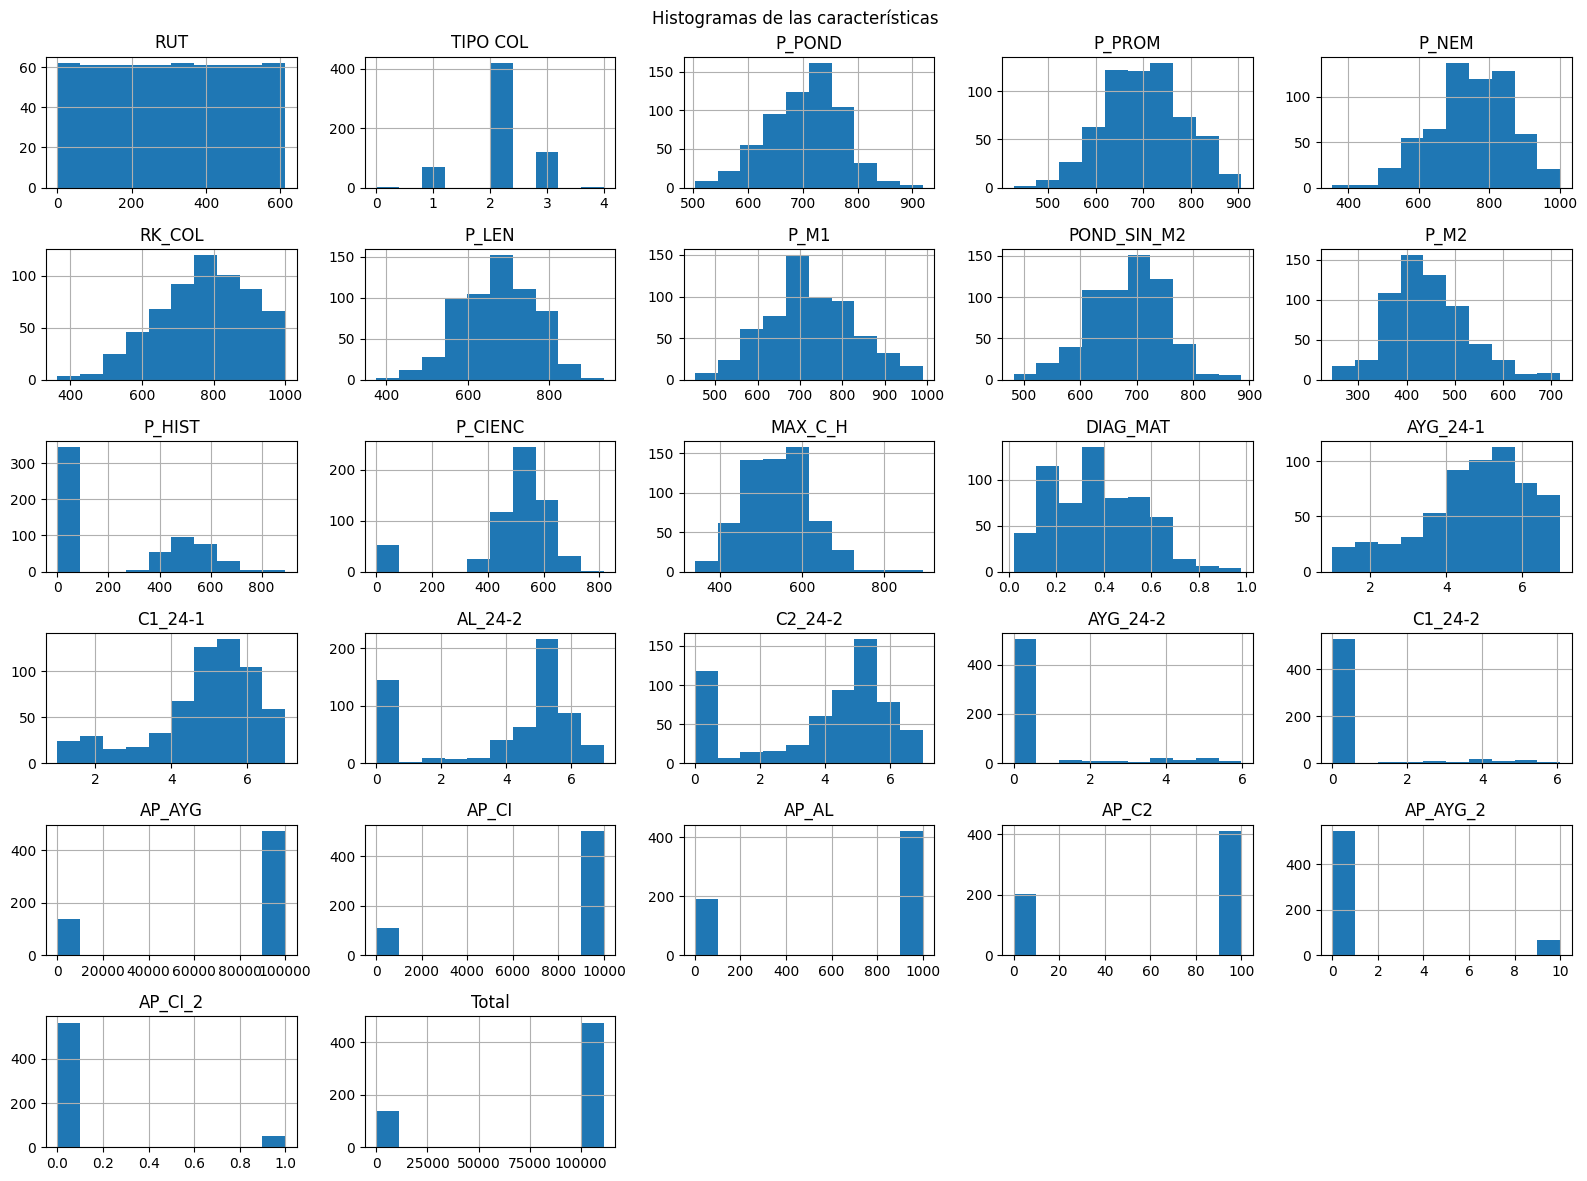

In [4]:
# Histogramas
df.hist(figsize=(16, 12))
plt.suptitle('Histogramas de las características')
plt.tight_layout()
plt.show()